In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
train = pd.read_csv('APC_TRAIN.csv')

C:\Users\parkpaul\AppData\Local\Temp\ipykernel_684\3295664322.py:1: DtypeWarning: Columns (8,16,63,64,95) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('APC_TRAIN.csv')


In [3]:
df = train[['Chamber Pdsf',
'Device',
'EXT_MAX',
'EXT_MEDIAN',
'EXT_MIN',
'EXT_MV_CENTER',
'EXT_MV_LCL',
'EXT_MV_UCL',
'EXT_Q1',
'EXT_Q3',
'Position X',
'Position Y',
'Prcs Dwell Pressure',
'Prcs Energy',
'Prcs Power Mean',
'Prcs Time',
'Prcs Welddepth',
'Prcs1 Amplitude',
'Prcs1 Pressure',
'Prcs1 Setvalue',
'Runnumber',
'Slot']]

In [4]:
df.loc[:, 'result1'] = 0

C:\Users\parkpaul\AppData\Local\Temp\ipykernel_684\3240796501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'result1'] = 0


In [5]:
df.loc[:, 'result1'] = np.where((df['EXT_MAX'] > df['EXT_MV_UCL']) | (df['EXT_MEDIAN'] > df['EXT_MV_UCL']) | (df['EXT_MEDIAN'] < df['EXT_MV_LCL']) | (df['EXT_MIN'] < df['EXT_MV_LCL']) | (df['EXT_MV_CENTER'] < df['EXT_MV_LCL']) | (df['EXT_MV_CENTER'] > df['EXT_MV_UCL']), 1, 0)

In [6]:
df.head()

,Chamber Pdsf,Device,EXT_MAX,EXT_MEDIAN,EXT_MIN,EXT_MV_CENTER,EXT_MV_LCL,EXT_MV_UCL,EXT_Q1,EXT_Q3,...,Prcs Energy,Prcs Power Mean,Prcs Time,Prcs Welddepth,Prcs1 Amplitude,Prcs1 Pressure,Prcs1 Setvalue,Runnumber,Slot,result1
0,1,2,"266,665,383,697,262","266,665,383,697,262","266,665,383,697,262","243,674,645,958,632","184,677,607,056,887","302,671,684,860,377","266,665,383,697,262","266,665,383,697,262",...,230.0,828.0,278.0,0.29,80.0,3.0,0.25,17,11,0
1,2,1,"255,374,207,481,682","255,374,207,481,682","255,374,207,481,682","250,813,446,202,375","18,735,307,992,664","31,427,381,247,811","255,374,207,481,682","255,374,207,481,682",...,260.0,875.0,298.0,0.27,80.0,3.0,0.25,5,5,0
2,1,2,"255,911,456,447,396","255,911,456,447,396","255,911,456,447,396","243,674,645,958,632","184,677,607,056,887","302,671,684,860,377","255,911,456,447,396","255,911,456,447,396",...,240.0,891.0,270.0,0.29,80.0,3.0,0.25,18,12,0
3,2,1,"246,860,619,603,763","246,860,619,603,763","246,860,619,603,763","250,813,446,202,375","18,735,307,992,664","31,427,381,247,811","246,860,619,603,763","246,860,619,603,763",...,246.0,813.0,303.0,0.28,80.0,3.0,0.25,6,6,0
4,2,1,"244,452,208,175,088","244,452,208,175,088","244,452,208,175,088","243,674,645,958,632","184,677,607,056,887","302,671,684,860,377","244,452,208,175,088","244,452,208,175,088",...,266.0,874.0,305.0,0.28,80.0,3.0,0.25,7,7,0


In [7]:
counts = [(df['result1'] == 0).sum(), (df['result1'] == 1).sum()]

<BarContainer object of 2 artists>

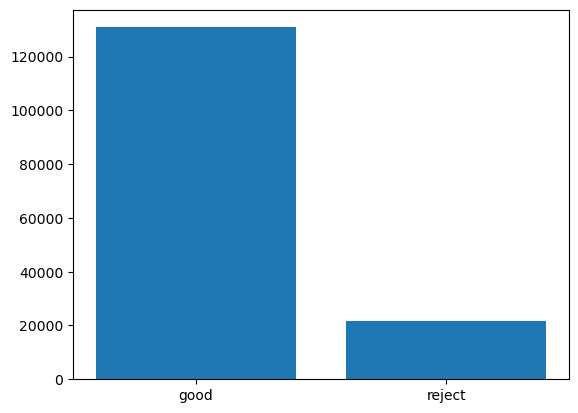

In [8]:
plt.bar(['good', 'reject'],counts)

In [9]:
df['result1'].groupby(df['Chamber Pdsf']).mean()

Chamber Pdsf
1    0.138495
2    0.144839
3    0.000000
Name: result1, dtype: float64

<Axes: xlabel='Chamber Pdsf', ylabel='count'>

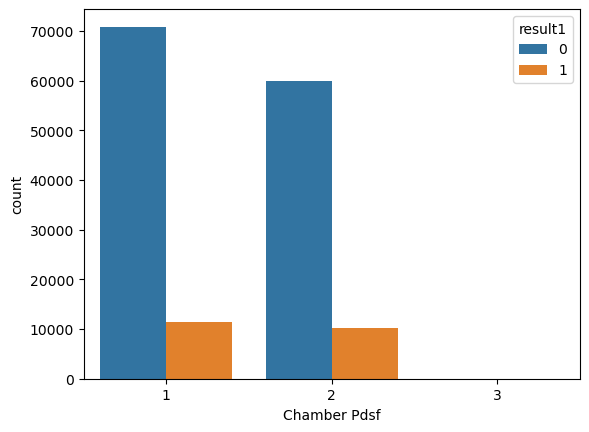

In [10]:
sns.countplot(x='Chamber Pdsf', hue='result1', data=df)

<Axes: xlabel='Device', ylabel='count'>

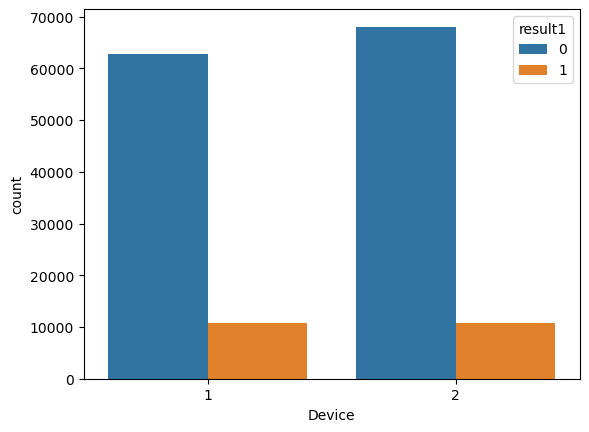

In [11]:
sns.countplot(x='Device', hue='result1', data=df)

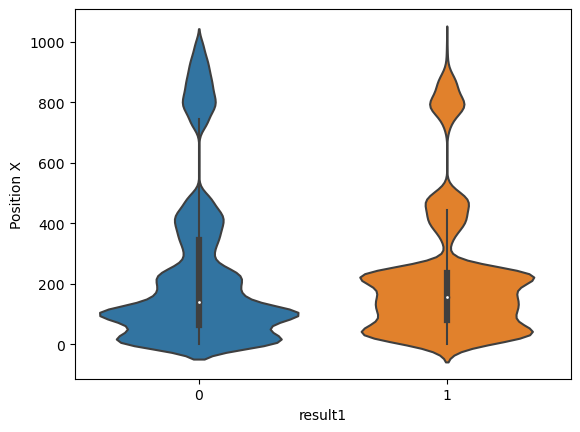

In [12]:
sns.violinplot(x='result1', y='Position X', data=df)
plt.show()

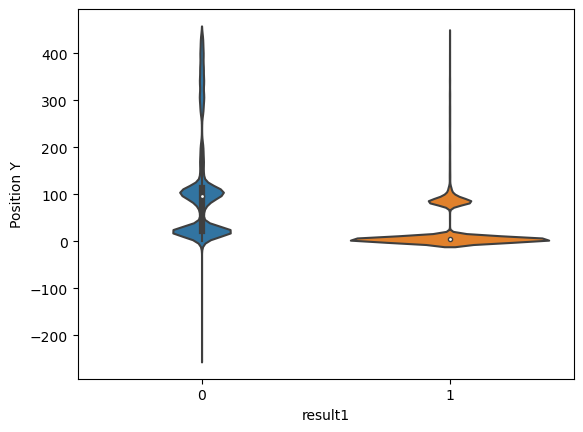

In [13]:
sns.violinplot(x='result1', y='Position Y', data=df)
plt.show()

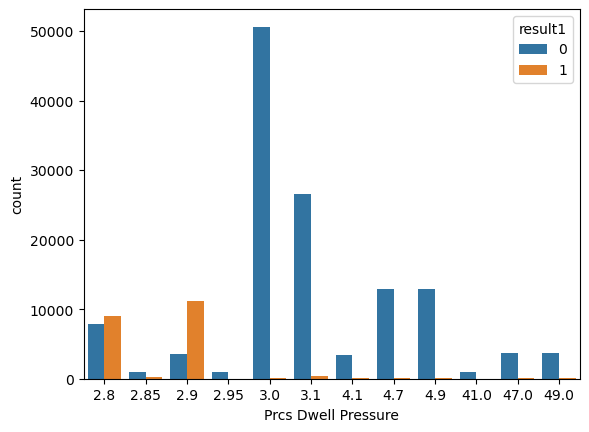

In [14]:
sns.countplot(x='Prcs Dwell Pressure', hue='result1', data=df)
plt.show()

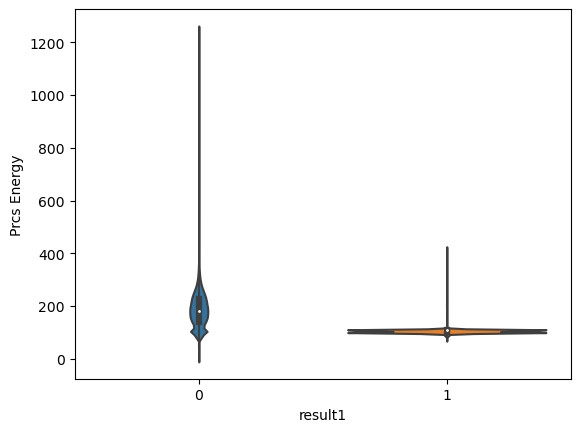

In [15]:
sns.violinplot(x='result1', y='Prcs Energy', data=df)
plt.show()

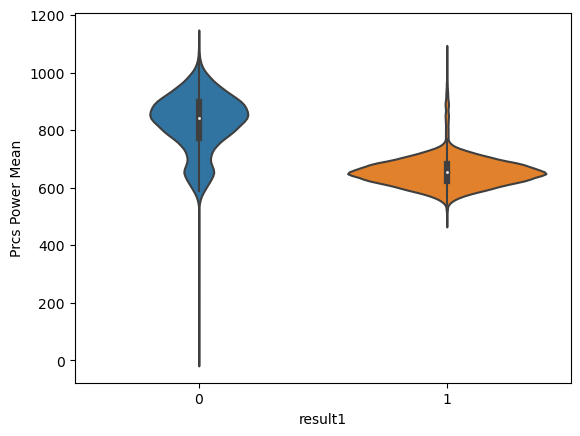

In [16]:
sns.violinplot(x='result1', y='Prcs Power Mean', data=df)
plt.show()

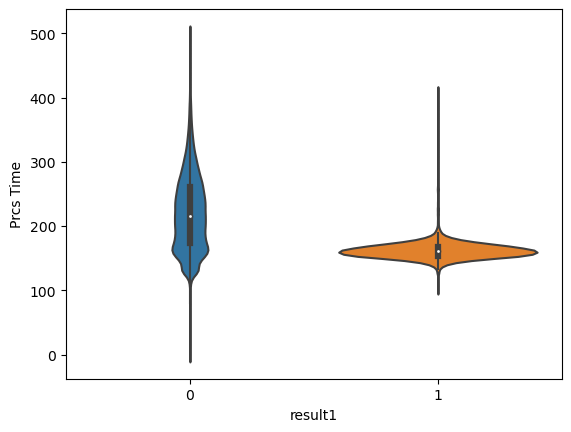

In [17]:
filtered_data = df[(df['Prcs Time'] >= 0) & (df['Prcs Time'] <= 500)]
sns.violinplot(x='result1', y='Prcs Time', data=filtered_data)
plt.show()

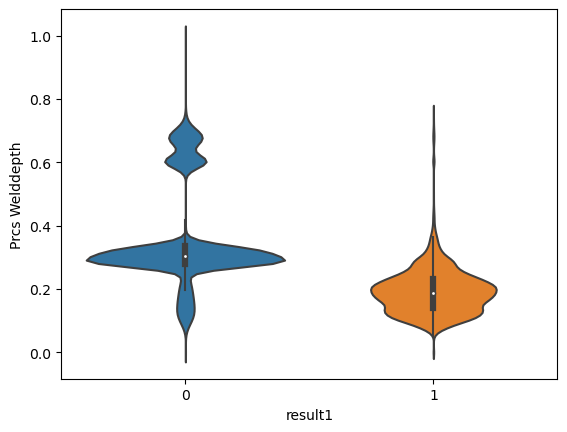

In [18]:
filtered_data = df[(df['Prcs Welddepth'] >= 0) & (df['Prcs Welddepth'] <= 1)]
sns.violinplot(x='result1', y='Prcs Welddepth', data=filtered_data)
plt.show()

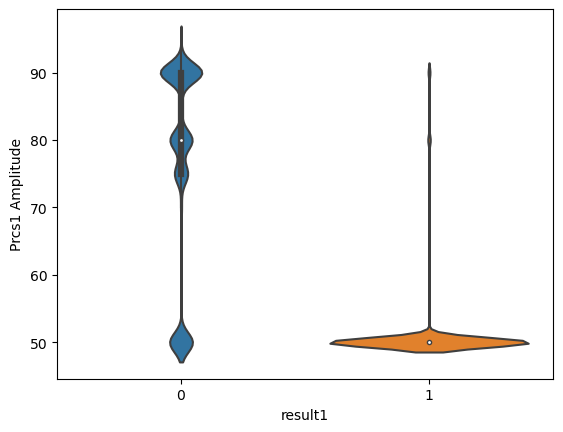

In [19]:
filtered_data = df[(df['Prcs1 Amplitude'] >= 10) & (df['Prcs1 Amplitude'] <= 300)]
sns.violinplot(x='result1', y='Prcs1 Amplitude', data=filtered_data)
plt.show()

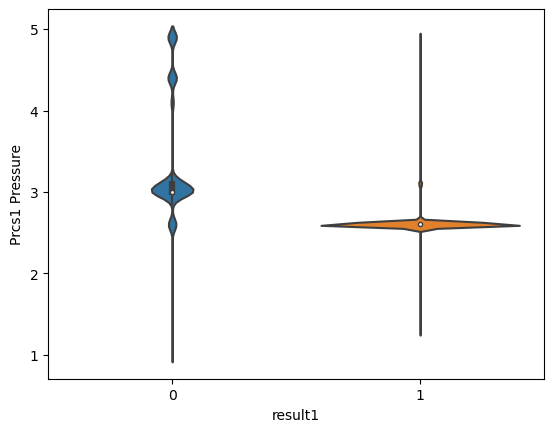

In [20]:
filtered_data = df[(df['Prcs1 Pressure'] >= 0) & (df['Prcs1 Pressure'] <= 10)]
sns.violinplot(x='result1', y='Prcs1 Pressure', data=filtered_data)
plt.show()

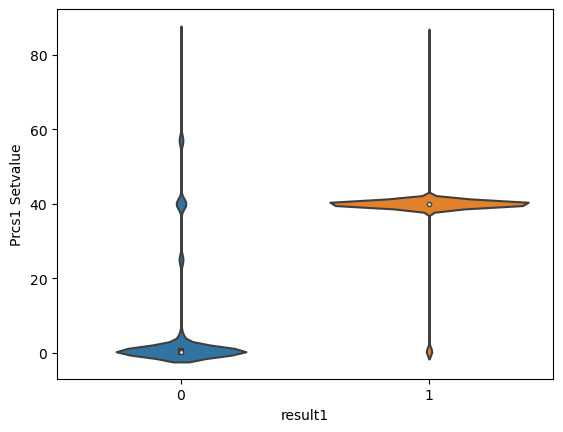

In [21]:
filtered_data = df[(df['Prcs1 Setvalue'] >= 0) & (df['Prcs1 Setvalue'] <= 100)]
sns.violinplot(x='result1', y='Prcs1 Setvalue', data=filtered_data)
plt.show()

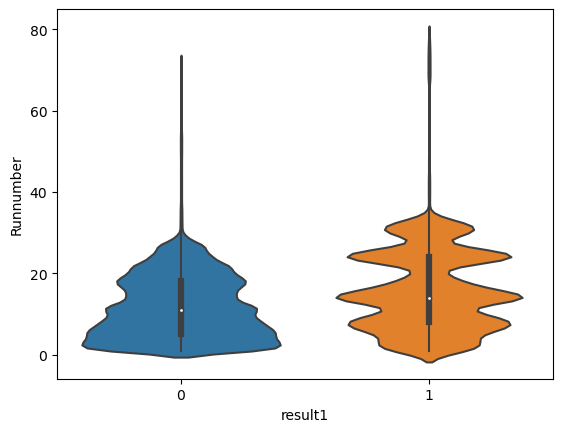

In [22]:
sns.violinplot(x='result1', y='Runnumber', data=df)
plt.show()

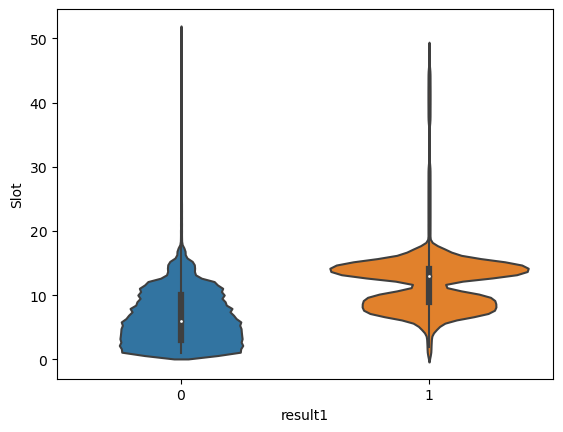

In [23]:
sns.violinplot(x='result1', y='Slot', data=df)
plt.show()

In [24]:
df2 = df[['Position X',
'Position Y',
'Prcs Dwell Pressure',
'Prcs Energy',
'Prcs Power Mean',
'Prcs Time',
'Prcs Welddepth',
'Prcs1 Amplitude',
'Prcs1 Pressure',
'Prcs1 Setvalue',
'Runnumber',
'Slot',
'result1']]

In [25]:
df2.head()

,Position X,Position Y,Prcs Dwell Pressure,Prcs Energy,Prcs Power Mean,Prcs Time,Prcs Welddepth,Prcs1 Amplitude,Prcs1 Pressure,Prcs1 Setvalue,Runnumber,Slot,result1
0,392.95,100.39,3.0,230.0,828.0,278.0,0.29,80.0,3.0,0.25,17,11,0
1,907.35,101.10,3.0,260.0,875.0,298.0,0.27,80.0,3.0,0.25,5,5,0
2,429.05,100.49,3.0,240.0,891.0,270.0,0.29,80.0,3.0,0.25,18,12,0
3,947.35,101.05,3.0,246.0,813.0,303.0,0.28,80.0,3.0,0.25,6,6,0
4,993.60,101.20,3.0,266.0,874.0,305.0,0.28,80.0,3.0,0.25,7,7,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [27]:
X = df2.drop('result1', axis=1) # Features
y = df2['result1']

In [28]:
imputer = SimpleImputer(strategy='mean')

In [29]:
imputer.fit(X)

SimpleImputer()

In [30]:
X_filled = pd.DataFrame(imputer.transform(X), columns=X.columns)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

In [32]:
rf_params = {
    'n_estimators': 150,            
    'max_features': int(sqrt(12)),  
    'max_depth': None,               
    'min_samples_split': 2,          
    'min_samples_leaf': 1,           
    'bootstrap': True,               
    'oob_score': True,               
    'random_state': 42,              
    'n_jobs': -1
}

In [33]:
# 6. Model Selection
# Using Random Forest Classifier here, you can choose another model
model = RandomForestClassifier(**rf_params)

# 7. Training the Model
model.fit(X_train, y_train)

# 8. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.99


In [34]:
df_test = pd.read_csv('APC_TEST.csv')

In [35]:
df_test.loc[:, 'result1'] = 0
df_test.loc[:, 'result1'] = np.where((df_test['EXT_MAX'] > df_test['EXT_MV_UCL']) | (df_test['EXT_MEDIAN'] > df_test['EXT_MV_UCL']) | (df_test['EXT_MEDIAN'] < df_test['EXT_MV_LCL']) | (df_test['EXT_MIN'] < df_test['EXT_MV_LCL']) | (df_test['EXT_MV_CENTER'] < df_test['EXT_MV_LCL']) | (df_test['EXT_MV_CENTER'] > df_test['EXT_MV_UCL']), 1, 0)

In [36]:
df_test = df_test[['Position X',
'Position Y',
'Prcs Dwell Pressure',
'Prcs Energy',
'Prcs Power Mean',
'Prcs Time',
'Prcs Welddepth',
'Prcs1 Amplitude',
'Prcs1 Pressure',
'Prcs1 Setvalue',
'Runnumber',
'Slot',
'result1']]

In [37]:
df_test.head()

,Position X,Position Y,Prcs Dwell Pressure,Prcs Energy,Prcs Power Mean,Prcs Time,Prcs Welddepth,Prcs1 Amplitude,Prcs1 Pressure,Prcs1 Setvalue,Runnumber,Slot,result1
0,986.75,100.50,3.1,189.0,844.0,224.0,0.29,80.0,3.1,0.25,1.0,1.0,0
1,782.25,100.71,3.1,139.0,828.0,168.0,0.29,80.0,3.1,0.25,13.0,1.0,0
2,781.95,100.60,3.1,206.0,847.0,244.0,0.29,80.0,3.1,0.25,2.0,2.0,0
3,982.25,100.71,3.1,162.0,865.0,188.0,0.29,80.0,3.1,0.25,14.0,2.0,0
4,821.90,100.60,3.1,279.0,880.0,318.0,0.27,80.0,3.1,0.25,3.0,3.0,0


In [38]:
df_test_features = df_test.drop('result1', axis=1)

In [39]:
df_test_features_imputed = pd.DataFrame(imputer.transform(df_test_features), columns=df_test_features.columns)

In [40]:
df_test_predictions = model.predict(df_test_features_imputed)

In [41]:
true_values = df_test['result1']

In [42]:
accuracy = accuracy_score(true_values, df_test_predictions)

In [43]:
print(f"Accuracy on new data: {accuracy:.2f}")

Accuracy on new data: 0.99
